In [1]:
import sys
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import copy
sys.path.insert(0, '/home/ryan/projects/CHARM-KASTr/py/')
from extraction import *

In [2]:
run floader.py

In [3]:
b = median(BIAS)

f = median(FLAT)

sf = bias_subtract(f, b)

m = create_mask(sf,b)

nf = normalize_flat(sf,m)


In [4]:
g = SCIENCE[1][0].data

gsub = bias_subtract(g, b)

gvar_im = variance_image(gsub)

gnorm = normalize_image(gsub, nf, m)

gvar_im_norm = normalize_image(gvar_im, nf, m)

gm = mask_image(gnorm, m)

pfit = slit_fit(gm)

g_weight = weight_function(gm, pfit)

gspec = extract_spectrum(gm, pfit, g_weight)

gvar = extract_variance(gvar_im_norm, pfit, g_weight)

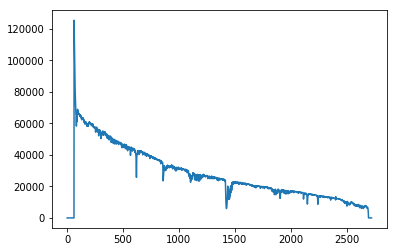

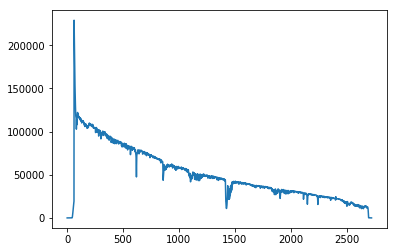

In [5]:
plt.plot(gspec)
plt.show()

plt.plot(gvar)
plt.show()

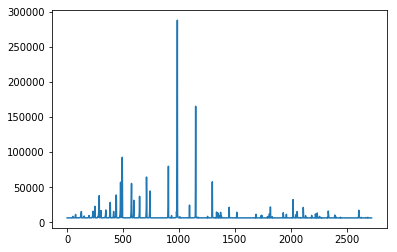

In [27]:
arcdata = ARC[0][0].data

arcd = copy.deepcopy(arcdata)

arc_slc = []

for i in range(len(arcd[:,0])):
    slc = arcd[i,:]
    arc_slc.append(slc[ int(pfit(i) - 3):int(pfit(i) + 3)])
    
plt.plot(np.sum(arc_slc, axis=1))

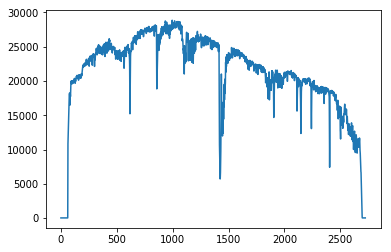

In [4]:
g_1042 = fits.open('/home/ryan/projects/CHARMKASTR/raw/data-2017-08-12-shane-Adam.Burgasser/red/1038/r1042.fits')

g_1042data = g_1042[0].data

g_1042_sub = bias_subtract(g_1042data, b)

g_1042_norm = normalize_image(g_1042_sub, nf, m)

g_1042_masked = mask_image(g_1042_sub, m)

poly = slit_fit(g_1042_masked)

g_1042_weight = weight_function(g_1042_masked, poly)

g_1042_spec = extract_spectrum(g_1042_masked, poly, g_1042_weight)

plt.plot(g_1042_spec)

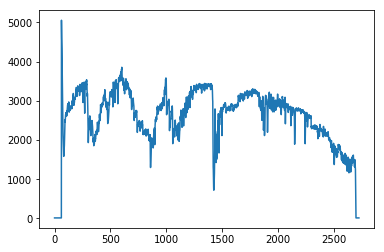

In [11]:
t = SCIENCE[0][0].data

tsub = bias_subtract(t, b)

tvar = variance_image(tsub)

tnorm = normalize_image(tsub, nf, m)

tm = mask_image(tnorm, m)

tf = extract_spectrum(tm, pfit, g_weight)

plt.plot(tf)

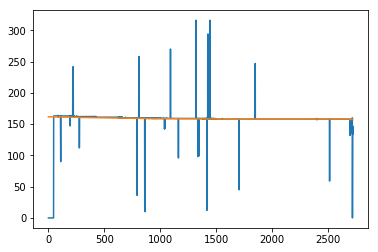

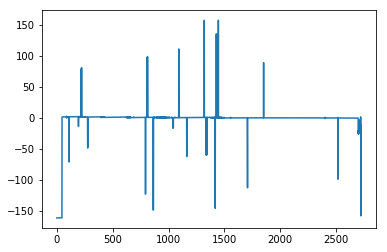

In [23]:
peaks = np.argmax(tm, axis=1)

xrange = np.arange(0, len(tm), 1)

plt.plot(peaks)
plt.plot(pfit(xrange))
plt.show()

plt.plot((peaks - pfit(xrange)))

In [7]:
ghdul = fits.open('/home/ryan/projects/CHARMKASTR/raw/data-2017-08-12-shane-Adam.Burgasser/red/test1035/science/r1033.fits')

g_star = ghdul[0].data

In [8]:
g_subtr = bias_subtract(g_star, b)

g_var = variance_image(g_subtr)


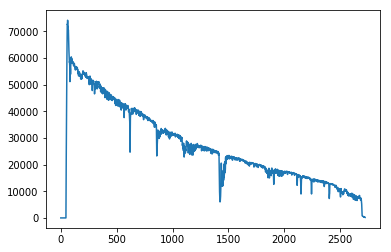

In [6]:
testg = copy.deepcopy(g_subtr)

testg_norm = normalize_image(testg, nf)

testg_masked = mask_image(testg_norm, m)


p = slit_fit(testg_masked)

testslc = []
for i in range(len(testg_masked[:, 0])):
    slc = testg_masked[i,:]
    testslc.append(slc[int(p(i)-10):int(p(i)+10)])


testw = []

for i in range(len(testslc)):
    slc = testslc[i]
    smax = np.amax(slc)
    smedian = np.median(slc)
        
    slc = slc - smedian
    slc = slc / smax
    
    testw.append(slc)

testwfunc = np.median(testw, axis=0)

testflx = []

for i in range(len(testslc)):
    for j in range(len(testslc[i])):
        if testwfunc[j] < 0.1:
            testslc[i][j] = testslc[i][j] - np.median(testslc[i])
            
        testslc[i][j] = testslc[i][j] * testwfunc[j]
        
    testflx.append(np.sum(testslc[i]) / np.sum(testwfunc)) 
    
plt.plot(testflx)

In [16]:
asd[1,:]

array([-2.,  4.,  4.,  2.,  0., -1.,  1.,  3.,  1., -5., -3., -2.,  2.,
       -4., -3.,  2.,  1., -4.,  2.,  0.,  2.,  0.,  5.,  2., -1.,  5.,
       -5., -4., -1.,  0.,  0., -1., -2.,  6., -1.,  1.,  1.,  2., -1.,
        2., -3., -3.,  0.,  1., -2.,  2., -4., -2.,  2.,  5.,  1.,  2.,
       -1.,  0., -4.,  2.,  3.,  2., -1.,  0.,  3.,  0.,  2.,  1.,  1.,
        0.,  8.,  3.,  0., -1.,  4.,  7.,  1.,  3.,  2.,  4.,  7.,  3.,
       -3., -2., -2.,  0., 11.,  2., -5.,  1.,  4.,  4.,  3.,  0.,  4.,
        1.,  4.,  1.,  5.,  6.,  6.,  6.,  2., -2.,  2.,  9.,  7.,  5.,
        3.,  3.,  3.,  4.,  6.,  3.,  6.,  3.,  6.,  2.,  5.,  0.,  4.,
        6.,  5.,  2.,  2.,  3.,  6.,  6.,  4.,  6.,  3.,  6.,  7.,  5.,
        5.,  6.,  7.,  0.,  7.,  4.,  3.,  4.,  9.,  7.,  8.,  3.,  1.,
        0.,  9.,  8., 11.,  5.,  6.,  8.,  6.,  5.,  9.,  4.,  7.,  8.,
        2.,  5.,  8.,  7.,  7.,  4.,  6.,  2.,  7.,  4.,  4.,  7.,  3.,
        1.,  4.,  2.,  4.,  3.,  0.,  5.,  2.,  4.,  4.,  1.,  1

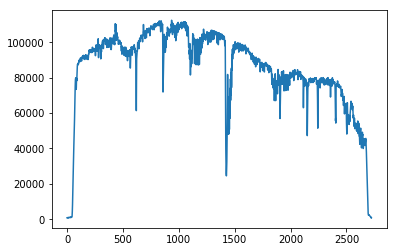

In [26]:
asd = copy.deepcopy(g_subtr)

bsd = copy.deepcopy(asd)

bsd = bsd / np.amax(nf)
plt.plot(np.sum(bsd, axis=1))

In [7]:
g_median = np.median(g_norm)

In [8]:
g_masked = copy.deepcopy(g_norm)

for i in range (g_masked.shape[0]):
    for j in range(g_masked.shape[1]):
        if m[i][j] == 1:
            g_masked[i][j] = g_median
            

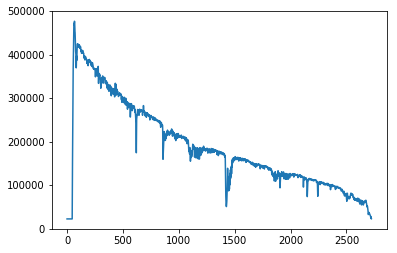

In [9]:
plt.plot(np.sum(g_masked, axis=1))

In [10]:
xpk = np.argmax(g_masked, axis=1)

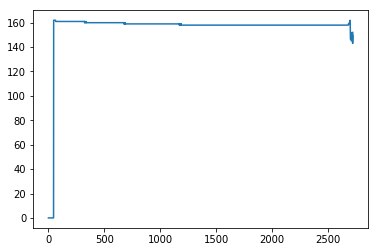

In [11]:
plt.plot(xpk)

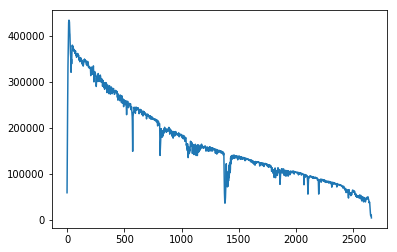

In [12]:
xpeak = []
impc = []
for i in range(len(g_masked[:,0])):
    slc = g_masked[i,:]
    xpeak.append(np.argmax(slc))
    if xpeak[-1] > 150 and xpeak[-1] < 165:
        impc.append(slc[xpeak[-1]-10:xpeak[-1]+10])
plt.plot(np.sum(impc,axis=1))

In [13]:
yrange = np.arange(0, xpk.size, 1)

fitxpk = copy.deepcopy(xpk)

xpkmedian = np.median(xpk)

'''
How to deal with outliers (identification and masking)?

Currently, just looking at the plot of x vs y and seeing a suitable range
if outside that range, masking by replacing with the median value.
'''

for i in range(xpk.size):
    if xpk[i] <= 155 or xpk[i] >= 165:
        fitxpk[i] = xpkmedian

'''
Fitting:
How to determine whether a 3rd order or 4th order fit is better?
Is there a higher order equivalent of an R^2?
'''
p = np.poly1d(np.polyfit(yrange, fitxpk, 3))

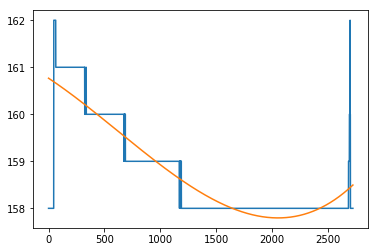

In [14]:
plt.plot(fitxpk)
plt.plot(yrange, p(yrange))

In [15]:
islc = []
for i in range(len(g_masked[:, 0])):
    slc = g_masked[i,:]
    islc.append(slc[int(p(i)-10):int(p(i)+10)])

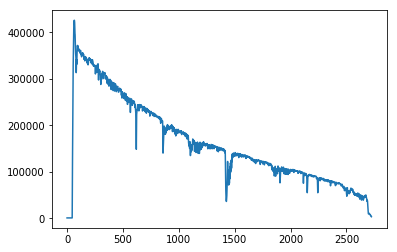

In [16]:
plt.plot(np.sum(islc, axis=1))

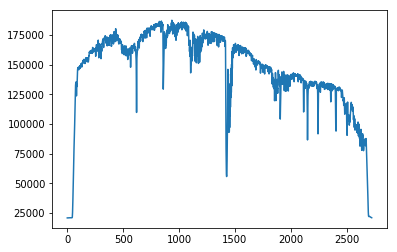

In [17]:
testslc = []
for i in range(len(g_star[:, 0])):
    slc = g_star[i,:]
    testslc.append(slc[int(p(i)-10):int(p(i)+10)])
    
plt.plot(np.sum(testslc, axis=1))

In [18]:
fslc = []
tslc = copy.deepcopy(islc)
for i in range(len(islc)):
    slc = tslc[i]
    smax = np.amax(slc)
    smedian = np.median(slc)
        
    slc = slc - smedian
    slc = slc / smax
    
    fslc.append(slc)


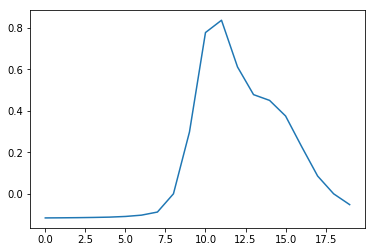

In [19]:
#median along which axis for the weighting function?

plt.plot(np.median(fslc, axis=0))



In [20]:
wfunc = np.median(fslc, axis=0)


In [21]:
flx = []
xslc = copy.deepcopy(islc)

for i in range(len(xslc)):
    for j in range(len(xslc[i])):
        if wfunc[j] < 0.1:
            xslc[i][j] = xslc[i][j] - np.median(xslc[i])
            
        xslc[i][j] = xslc[i][j] * wfunc[j]
        
    flx.append(np.sum(xslc[i]) / np.sum(wfunc)) 
        

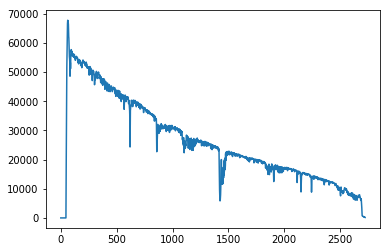

In [22]:
plt.plot(flx)

In [7]:
testg_norm = copy.deepcopy(g_norm)

for i in range(len(testg_norm)):
    testg_norm[i] = testg_norm[i] / np.amax(nf[i])


testg_masked = copy.deepcopy(testg_norm)
testg_median = np.median(testg_norm)

for i in range (testg_masked.shape[0]):
    for j in range(testg_masked.shape[1]):
        if m[i][j] == 1:
            testg_masked[i][j] = testg_median
            
plt.plot(np.sum(testg_masked, axis=1))

NameError: name 'g_norm' is not defined

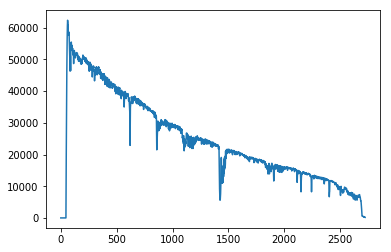

In [9]:
plt.plot(testflx)

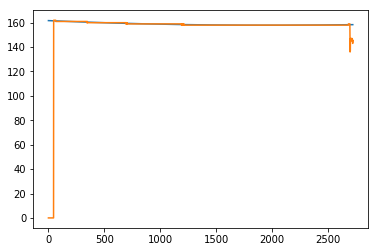

In [14]:
t = np.arange(0, len(testg_masked), 1)

gxpk = np.argmax(testg_masked, axis=1)

plt.plot(t, p(t))
plt.plot(gxpk)